In [166]:
!pip3 install wordcloud

In [167]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# 현재 작업 디렉토리를 기준으로 파일 경로 설정
current_dir = os.getcwd()
csv_file_path = os.path.join(current_dir, '..', '..', 'data', 'processed', 'KoBert_preprocessed_reviews.csv')

# CSV 파일 읽기
df = pd.read_csv(csv_file_path, encoding='utf-8-sig')

In [168]:
# 데이터 갯수 확인
print("Total number of rows:", len(df))

# 데이터 샘플 확인 (상위 5개)
print("\nSample data:")
display(df.head())  # DataFrame 출력

# null 값 확인
print("\nNull values in each column:")
display(df.isnull().sum())  # Null 값 확인

Total number of rows: 20983

Sample data:


,Review_Text,Label
0,맛있고 직원들 친절합니다근데 밤에 갔는데 건물 들어가는 입구를 뭐라도 표시해줘야할 ...,1
1,쌀국수와 분짜맛있어요고수를 좋아해 더 달라해서 먹었어요,2
2,아웅 자극적인 맛,4
3,만두는 참 맛있게 먹었음군만두도 육즙이 많은 만두 고기만두는 약간 찐빵같은 만두였는...,3
4,취미로 식당을 하시는건가 봐요,0



Null values in each column:


Review_Text    0
Label          0
dtype: int64


Count of each label:


Label
2    6415
3    5214
4    3653
0    3548
1    2153
Name: count, dtype: int64

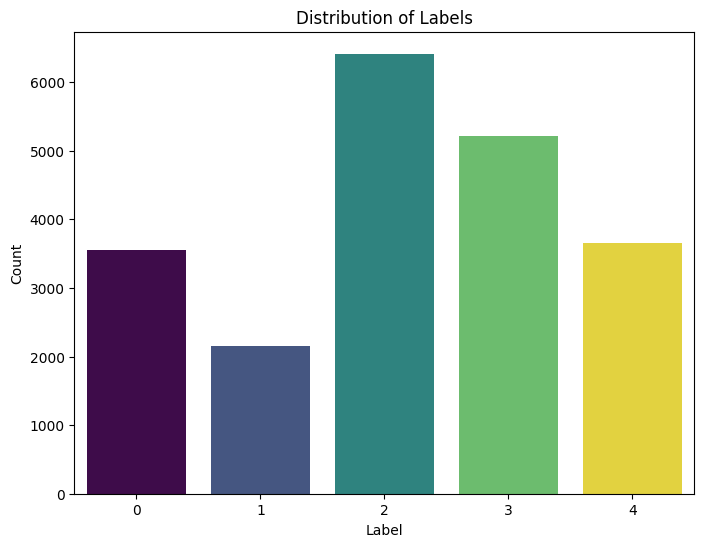

In [169]:
# 레이블별 데이터 갯수 확인
label_counts = df['Label'].value_counts()
print("\nCount of each label:")
display(label_counts)

# 레이블 분포도 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df, hue='Label', palette='viridis', legend=False)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

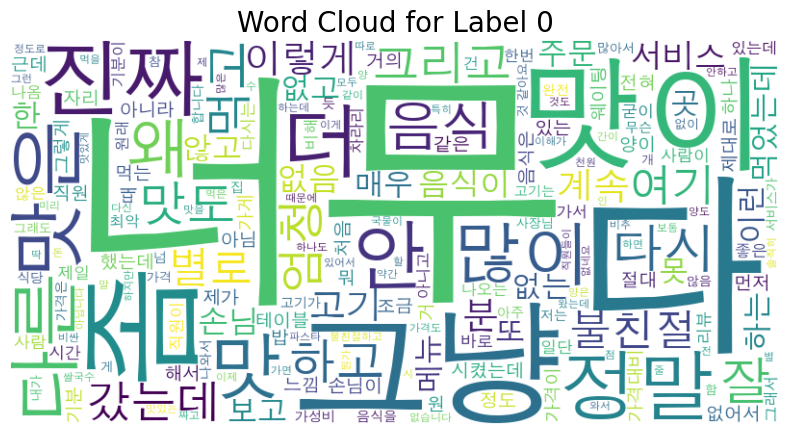

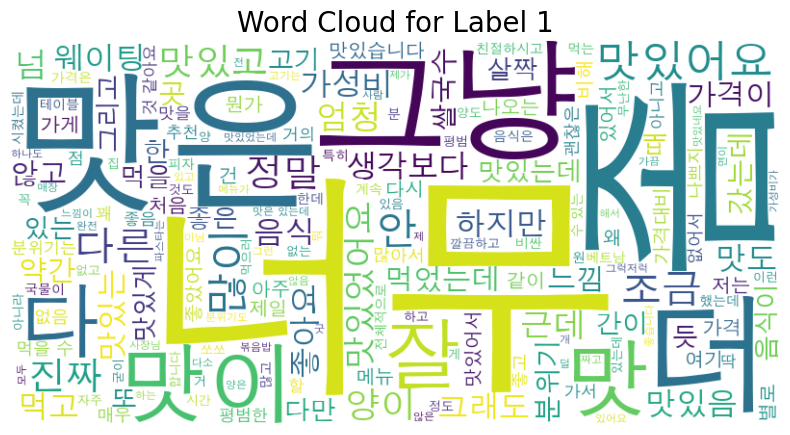

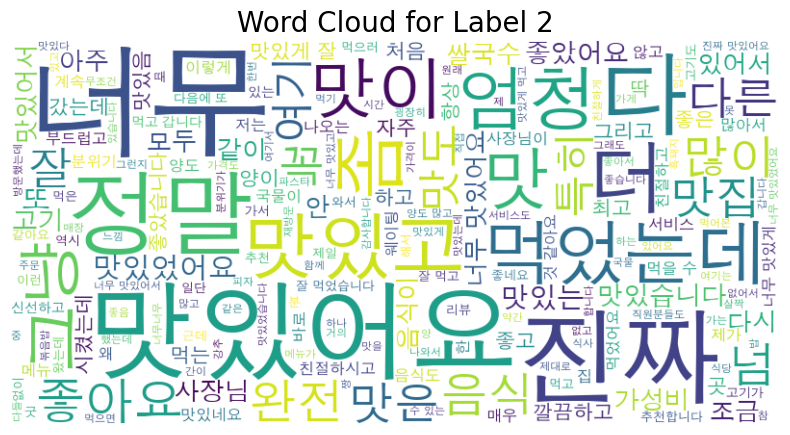

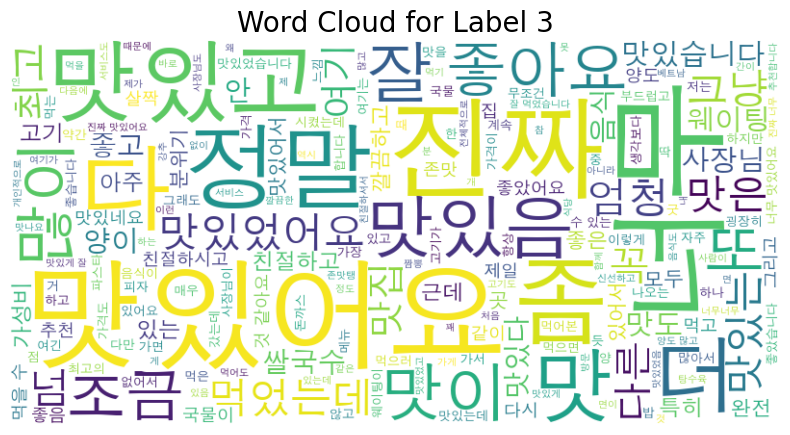

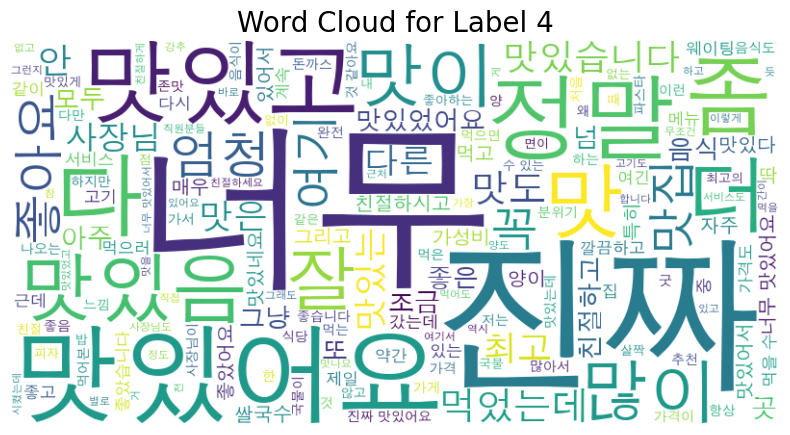

In [170]:
# 워드 클라우드를 위한 stopwords 설정
stopwords = set(STOPWORDS)
stopwords.update(["이", "그", "저", "있다", "하다"])  # 추가적인 불용어를 업데이트할 수 있습니다.

# 워드 클라우드 생성 함수
def generate_wordcloud(text, title=None):
    wordcloud = WordCloud(
        width=800,
        height=400,
        font_path='AppleGothic.ttf',  # 폰트 경로 설정
        background_color='white',
        stopwords=stopwords,
        min_font_size=10,
        colormap='viridis'  # 색상맵을 viridis로 설정하여 깔끔하게
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, size=20)
    plt.show()

# 각 레이블에 대한 워드 클라우드 생성
for label in sorted(df['Label'].unique()):
    label_text = " ".join(df[df['Label'] == label]['Review_Text'])
    generate_wordcloud(label_text, title=f"Word Cloud for Label {label}")